# Part 1 - Exploratory Data Analysis

### Lets create a time series plot using only matplotlib and python's standard libraries

In [1]:
import json
from datetime import datetime, timedelta
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
FILE_PATH = '../data/logins.json'

In [3]:
# open json data file with context manager
with open(FILE_PATH) as json_file:
    logins = json.load(json_file)
    
    # assert data is a dictionart
    assert type(logins) == dict

In [4]:
logins.keys()

dict_keys(['login_time'])

In [5]:
# extract login_time strings from json data
timestamps = logins['login_time']
assert type(timestamps) == list

In [6]:
# convert login timestamps to datetime objects with list comprehension
dt_timestamps = [datetime.strptime(login_time, '%Y-%m-%d %H:%M:%S') for login_time in timestamps]
assert type(dt_timestamps[0]) == datetime

In [7]:
# make sure timestamps are sorted chronologically
sorted_timestamps = sorted(dt_timestamps)

In [8]:
# create a clear and logical start date and time for aggregation
adjust_start = timedelta(minutes=sorted_timestamps[0].minute % 15, seconds=sorted_timestamps[0].second)
start = sorted_timestamps[0] - adjust_start


# create a clear and logical start date and time for aggregation
adjust_end = timedelta(minutes=((14 - sorted_timestamps[-1].minute) % 15), seconds=(60 - sorted_timestamps[-1].second))
end = sorted_timestamps[-1] + adjust_end


# define size of time intervals for aggregation
interval = timedelta(minutes=15)

In [9]:
# aggregate times into dictionary
agg_dict = OrderedDict()
window_start = start
window_end = window_start + interval
login_idx = 0
dict_vals = []

# create aggregated dict where
#   key = datetime at start of 15 min interval
#   val = list of timestamps for each login in the 15 min interval
while ((window_end <= end) and (login_idx<len(sorted_timestamps))):
    
    # check if current login is outside the current login window
    if sorted_timestamps[login_idx] > window_end:
        
        # save previous dictionary entry
        agg_dict[dict_key] = dict_vals
        
        # reset for next 15 min bucket
        window_start = window_end
        window_end = window_start + interval
        dict_vals = []
        
    else: # if sorted_timestamps[login_idx] <= window_end:
        dict_key = window_start
        dict_vals.append(sorted_timestamps[login_idx])
        login_idx += 1


In [10]:
# create counts dict where
#   key = datetime at start of 15 min interval
#   val = count of timestamped logins in the 15 min interval
counts_dict = {key: len(agg_dict[key]) for key in agg_dict.keys()}
counts_dict = OrderedDict()

for key, vals in agg_dict.items():
    counts_dict[key] = len(vals)
    
for key in sorted(agg_dict.keys()):
    counts_dict[key] = len(agg_dict[key])

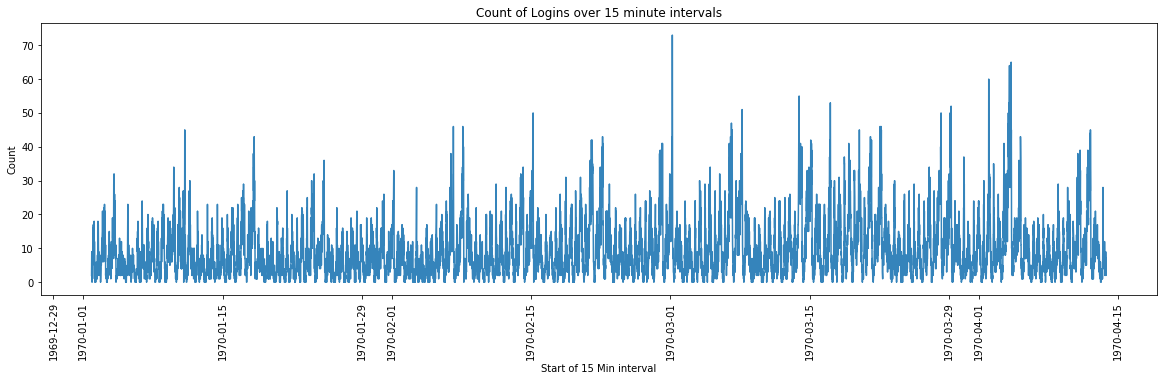

In [11]:
# mute matplotlib data warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# visualize complete time series
x = counts_dict.keys()
y = counts_dict.values()
_ = plt.figure(figsize=(20, 5))
_ = plt.plot(x, y, alpha=0.9)
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Start of 15 Min interval')
_ = plt.ylabel('Count')
_ = plt.title('Count of Logins over 15 minute intervals')


## Now, lets recreate the above plot with pandas using only 4 lines of code

In [12]:
import pandas as pd

In [13]:
# read json data file with pandas
logins_df = pd.read_json(FILE_PATH)

In [14]:
# create datetime index from login_time column
logins_df.index = pd.to_datetime(logins_df.login_time)

In [15]:
# resample and aggregate with count()
resampled_df = logins_df.resample('15min').count()

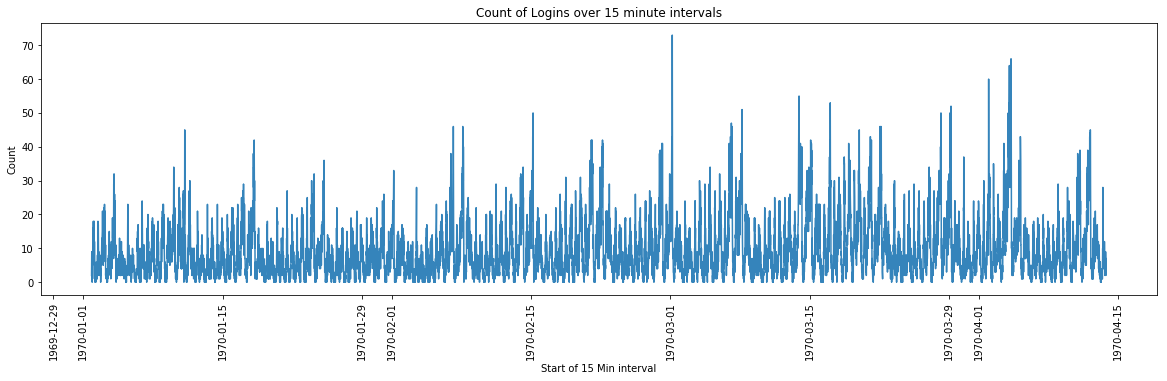

In [16]:
# visualize complete time series
_ = plt.figure(figsize=(20, 5))
_ = plt.plot(resampled_df, alpha=0.9)
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Start of 15 Min interval')
_ = plt.ylabel('Count')
_ = plt.title('Count of Logins over 15 minute intervals')

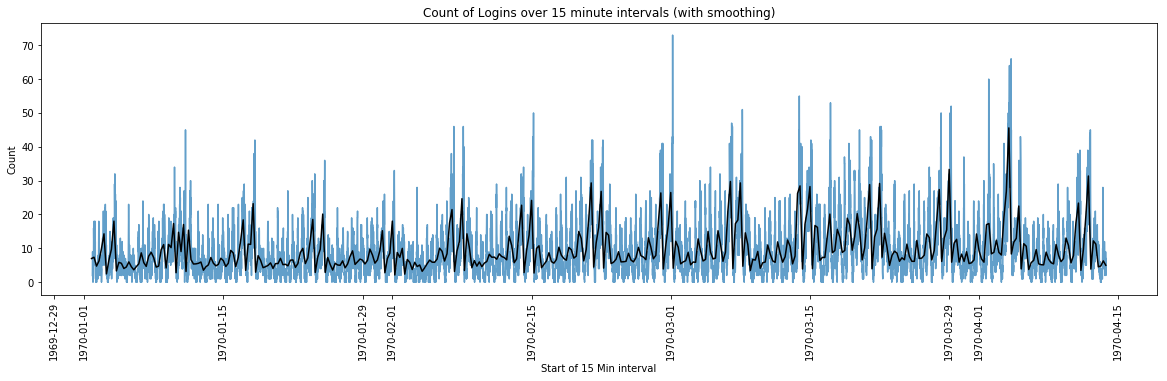

In [17]:
# this is still rough, so lets add some smoothing
hourly_df= resampled_df.resample('6H').mean()

# visualize complete time series
_ = plt.figure(figsize=(20, 5))
_ = plt.plot(resampled_df, alpha=0.7)
_ = plt.plot(hourly_df, alpha=1.0, color='k')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Start of 15 Min interval')
_ = plt.ylabel('Count')
_ = plt.title('Count of Logins over 15 minute intervals (with smoothing)')


In [18]:
# lets look at the 4 different months
logins_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


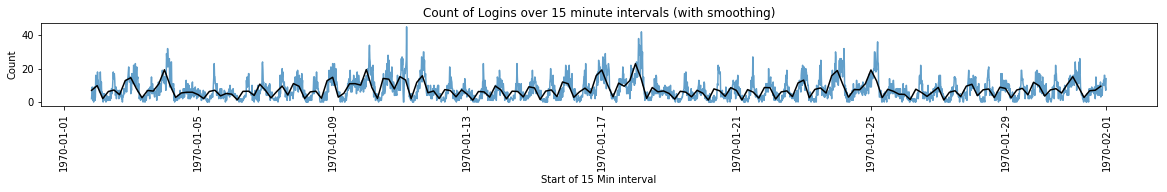

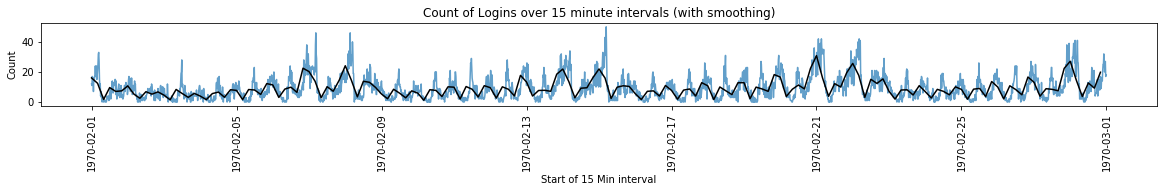

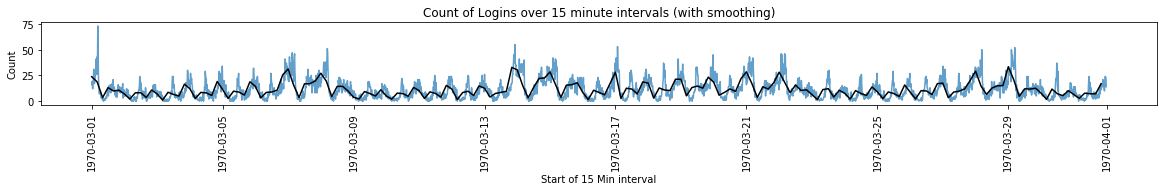

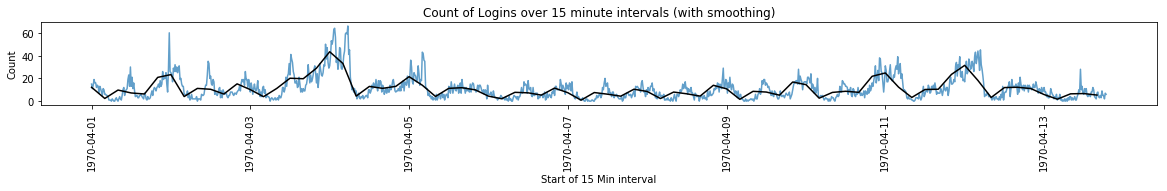

In [19]:
smooth_factor = '4H'

january = resampled_df.loc['1970-01']
jan_smoothed = january.resample(smooth_factor).mean()

february = resampled_df.loc['1970-02']
feb_smoothed = february.resample(smooth_factor).mean()

march = resampled_df.loc['1970-03']
mar_smoothed = march.resample(smooth_factor).mean()

april = resampled_df.loc['1970-04']
apr_smoothed = april.resample(smooth_factor).mean()

_ = plt.figure(figsize=(20, 7))

# visualize complete time series for January
_ = plt.subplot(4, 1, 1)
_ = plt.plot(january, alpha=0.7)
_ = plt.plot(jan_smoothed, alpha=1.0, color='k')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Start of 15 Min interval')
_ = plt.ylabel('Count')
_ = plt.title('Count of Logins over 15 minute intervals (with smoothing)')
plt.show()

_ = plt.figure(figsize=(20, 7))
# visualize complete time series for Febraury
_ = plt.subplot(4, 1, 2)
_ = plt.plot(february, alpha=0.7)
_ = plt.plot(feb_smoothed, alpha=1.0, color='k')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Start of 15 Min interval')
_ = plt.ylabel('Count')
_ = plt.title('Count of Logins over 15 minute intervals (with smoothing)')
plt.show()

_ = plt.figure(figsize=(20, 7))
# visualize complete time series for March
_ = plt.subplot(4, 1, 3)
_ = plt.plot(march, alpha=0.7)
_ = plt.plot(mar_smoothed, alpha=1.0, color='k')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Start of 15 Min interval')
_ = plt.ylabel('Count')
_ = plt.title('Count of Logins over 15 minute intervals (with smoothing)')
plt.show()

_ = plt.figure(figsize=(20, 7))
# visualize complete time series for April
_ = plt.subplot(4, 1, 4)
_ = plt.plot(april, alpha=0.7)
_ = plt.plot(apr_smoothed, alpha=1.0, color='k')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Start of 15 Min interval')
_ = plt.ylabel('Count')
_ = plt.title('Count of Logins over 15 minute intervals (with smoothing)')
plt.show()

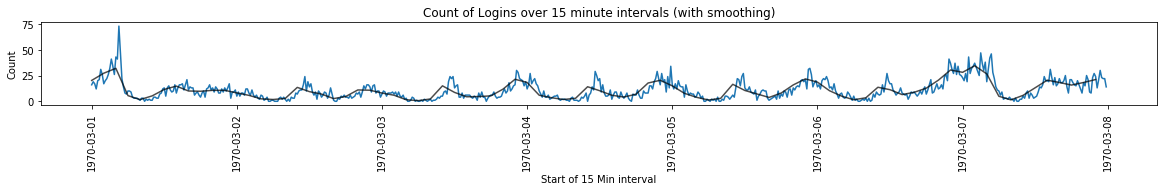

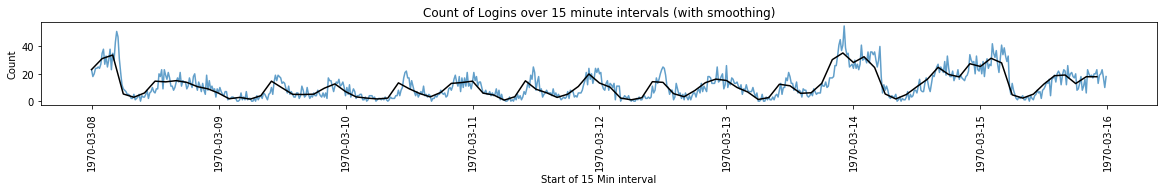

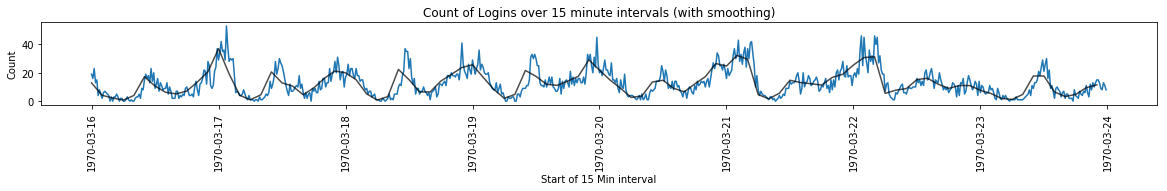

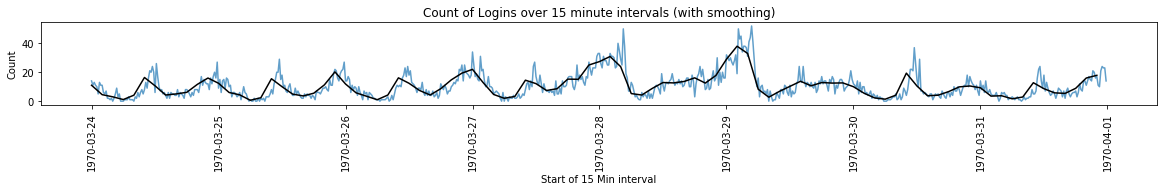

In [23]:
# still not too helpful, lets look at each week in March
smooth_factor = '2H'

week1 = resampled_df.loc['1970-03-01':'1970-03-07']
week1_smoothed = week1.resample(smooth_factor).mean()

week2 = resampled_df.loc['1970-03-08':'1970-03-15']
week2_smoothed = week2.resample(smooth_factor).mean()

week3 = resampled_df.loc['1970-03-16':'1970-03-23']
week3_smoothed = week3.resample(smooth_factor).mean()

week4 = resampled_df.loc['1970-03-24':'1970-03-31']
week4_smoothed = week4.resample(smooth_factor).mean()

_ = plt.figure(figsize=(20, 7))

# visualize complete time series for January
_ = plt.subplot(4, 1, 1)
_ = plt.plot(week1, alpha=1.0)
_ = plt.plot(week1_smoothed, alpha=0.7, color='k')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Start of 15 Min interval')
_ = plt.ylabel('Count')
_ = plt.title('Count of Logins over 15 minute intervals (with smoothing)')
plt.show()

_ = plt.figure(figsize=(20, 7))
# visualize complete time series for Febraury
_ = plt.subplot(4, 1, 2)
_ = plt.plot(week2, alpha=0.7)
_ = plt.plot(week2_smoothed, alpha=1.0, color='k')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Start of 15 Min interval')
_ = plt.ylabel('Count')
_ = plt.title('Count of Logins over 15 minute intervals (with smoothing)')
plt.show()

_ = plt.figure(figsize=(20, 7))
# visualize complete time series for March
_ = plt.subplot(4, 1, 3)
_ = plt.plot(week3, alpha=1.0)
_ = plt.plot(week3_smoothed, alpha=0.7, color='k')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Start of 15 Min interval')
_ = plt.ylabel('Count')
_ = plt.title('Count of Logins over 15 minute intervals (with smoothing)')
plt.show()

_ = plt.figure(figsize=(20, 7))
# visualize complete time series for April
_ = plt.subplot(4, 1, 4)
_ = plt.plot(week4, alpha=0.7)
_ = plt.plot(week4_smoothed, alpha=1.0, color='k')
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Start of 15 Min interval')
_ = plt.ylabel('Count')
_ = plt.title('Count of Logins over 15 minute intervals (with smoothing)')

### The above plots are a clear demonstration of the alternating/complementary circadian rythms. The period between each peak is 12 hours or half of a day. 

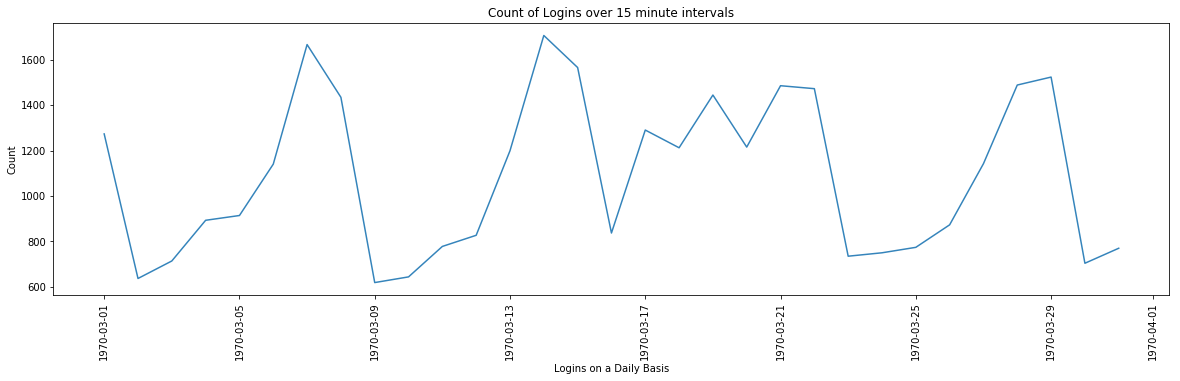

In [27]:
daily_df = logins_df.resample('D').count()
# visualize complete time series
_ = plt.figure(figsize=(20, 5))
_ = plt.plot(daily_df.loc['1970-03'], alpha=0.9)
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Logins on a Daily Basis')
_ = plt.ylabel('Count')
_ = plt.title('Count of Logins over 15 minute intervals')

### Peaks correspond to high level of weekend activity. Usage builds leading up to Saturday, and then drops drastically on Monday.